In [1]:
import numpy as np
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt


rho_values = {}


In [2]:
def loadMNIST( prefix, folder ):
    intType = np.dtype( 'int32' ).newbyteorder( '>' )
    nMetaDataBytes = 4 * intType.itemsize

    data = np.fromfile( folder + "/" + prefix + '-images.idx3-ubyte', dtype = 'ubyte' )
    magicBytes, nImages, width, height = np.frombuffer( data[:nMetaDataBytes].tobytes(), intType )
    data = data[nMetaDataBytes:].astype( dtype = 'float32' ).reshape( [ nImages, width, height ] )

    #labels = np.fromfile( folder + "/" + prefix + '-labels-idx1-ubyte',
    #                    #  dtype = 'ubyte' )[2 * intType.itemsize:]

    return np.array(data) #, labels

In [3]:

rho_values['MNIST'] = [loadMNIST( "train", "/Users/scinawa/workspace/Schatten-p-plot/Schatten-p-plot" )]

In [4]:


rho_values['BankNote'] = [pd.read_csv("bank_note_data.csv", header = 0, sep = ",").to_numpy()]

In [5]:

print(type(rho_values['MNIST'][0]))
print(type(rho_values['BankNote'][0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
# Define the values of p
p_values =[p for p in range(1, 40)]


def valuez(s,p, normz):
    return (np.sqrt(2) * normz) ** (p / 2) / np.sqrt(np.sum(np.power(np.abs(s), p)))

for matelm in rho_values:
    print("Matrix", matelm)
    _, s, _ = np.linalg.svd(rho_values[matelm][0])

    norm_A = np.max(s)

    points_plot = [valuez(s, p, norm_A) for p in p_values]

    rho_values[matelm].append(points_plot)




Matrix MNIST


/var/folders/cd/x29qw_lj0yzf26xq_q6rzr3r0000gn/T/ipykernel_48058/513209369.py:6: RuntimeWarning: overflow encountered in power
  return (np.sqrt(2) * normz) ** (p / 2) / np.sqrt(np.sum(np.power(np.abs(s), p)))


Matrix BankNote


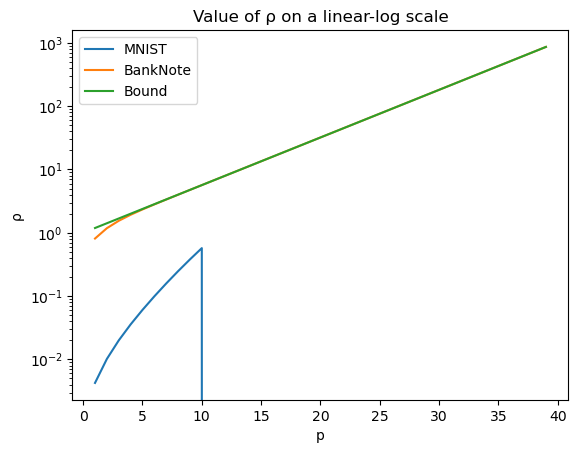

In [9]:

# Plot the values of ρ on a linear-log scale
for matelm in rho_values:
    #print(rho[0])
    plt.plot(p_values, rho_values[matelm][1], label=matelm)
    
plt.plot(p_values, [np.sqrt(2)**(p/2) for p in p_values], label='Bound')

plt.xlabel('p')
plt.ylabel('ρ')
plt.xscale('linear')
plt.legend()
plt.yscale('log')
plt.title('Value of ρ on a linear-log scale')
plt.show()